In [1]:
import numpy as np

In [2]:
import networkx as nx
class Nodo:
    def __init__(self,nodo, puzzle=None,nodoshijos=None, accion=None):
        self.nodo=nodo
        self.nodoPadre=None
        self.nodoshijos=nodoshijos
        self.puzzle=puzzle
        self.accion = accion
    def __str__(self):
        return self.nodo
    def __eq__(self, obj):
        return (self.puzzle==obj.puzzle).all()
    def obtenerlistaordenadaheuristica(self, nodometa):
        for i in range(len(self.nodoshijos)):
          for j in range(len(self.nodoshijos)): 
            vi = calculateHeuristic(self.nodoshijos[i], nodometa)
            vj = calculateHeuristic(self.nodoshijos[j], nodometa)
            if(vj < vi):
                nodotemp = self.nodoshijos[i]
                self.nodoshijos[i] = self.nodoshijos[j]
                self.nodoshijos[j] = nodotemp


In [3]:
arrayI = np.array([[1,0], [3,2]])
arrayM = np.array([[1,2], [3,0]])
arrayI.shape

(2, 2)

In [4]:
def buscar_espacio_vacio(arreglo):
  for i in range(arreglo.shape[0]):
    for j in range(arreglo.shape[1]):
      if(arreglo[i,j] == 0):
        return np.array([i,j])

In [5]:
def pos_adyacente(i, j): 
  i_arriba = i - 1 
  i_abajo = i + 1  
  j_izquierda = j - 1
  j_derecha= j + 1    
  return np.array([[i_arriba,j, "Arriba"],[i_abajo,j, "Abajo"],[i, j_izquierda, "Izquierda"], [i, j_derecha, "Derecha"]])

In [6]:
(i,j) = buscar_espacio_vacio(arrayI)
print(i,j)

0 1


In [7]:
pos_ayacentes = pos_adyacente(i, j)

In [8]:
pos_ayacentes
pos_ayacentes.shape

(4, 3)

In [9]:
 def crear_puzzle_hijos(i,j,pos_ayacentes,puzzle):
    puzzle_hijos= []
    fil,col = puzzle.shape
    puzzle_acciones= []
    for i_ady1,j_ady1, accion in pos_ayacentes:     
        i_ady = int(i_ady1)
        j_ady = int(j_ady1)
        puzzle_hijo = puzzle.copy()
        val_vacio = puzzle[i,j]        
        if (0<=i_ady and i_ady<fil) and (0<=j_ady and j_ady<col):
            val_temp = puzzle[i_ady,j_ady]
            puzzle_hijo[i,j] = val_temp
            puzzle_hijo[i_ady,j_ady] = val_vacio
            puzzle_hijos.append(puzzle_hijo)    
            puzzle_acciones.append(accion)        
    return puzzle_hijos, puzzle_acciones   

In [10]:
puzzle_hijos = crear_puzzle_hijos(i,j,pos_ayacentes,arrayI)
print(puzzle_hijos)

([array([[1, 2],
       [3, 0]]), array([[0, 1],
       [3, 2]])], ['Abajo', 'Izquierda'])


In [11]:
puzzle = np.array([[1,0], [3,2]])
nodo = Nodo("A",puzzle)
nodo.nodoshijos=puzzle_hijos
puzzleM = np.array([[1,2], [3,0]])
nodoMeta = Nodo("G",puzzleM)

In [255]:
def crear_nodos_hijos(nodo):
    (i,j) = buscar_espacio_vacio(nodo.puzzle)
    pos_ayacentes = pos_adyacente(i, j)
    puzzle_hijos, puzzle_accion = crear_puzzle_hijos(i,j,pos_ayacentes,nodo.puzzle)
    nodos_hijos=[]
    id_nodo = "A_"+str(random.random())
    con = 0
    for hijo in puzzle_hijos:
        id_nodo_hijo = id_nodo+str(con)
        nodos_hijos.append(Nodo(id_nodo_hijo,hijo, accion=puzzle_accion[con]))
        con = con+1
    return nodos_hijos

In [13]:
arrayM = np.array([[1,2], [3,0]])
arrayN = np.array([[1,2], [3,1]])
print((arrayM==arrayM).all())
print((arrayM==arrayN).all())

True
False


In [14]:
def es_nodo_meta(nodo,nodoMeta):
    return (nodo.puzzle==nodoMeta.puzzle).all()

In [15]:
nodo = Nodo("A",puzzle)
nodoMeta = Nodo("G",puzzleM)
print(es_nodo_meta(nodo,nodoMeta))
print(es_nodo_meta(nodoMeta,nodoMeta))


False
True


In [16]:
nodos_hijos = crear_nodos_hijos(nodo)
for nodohijo in nodos_hijos:
    print(nodohijo.nodo,nodohijo.puzzle)

A_0 [[1 2]
 [3 0]]
A_1 [[0 1]
 [3 2]]


In [17]:
def resolver_puzzle(nodoInicial,nodoMeta):
    nodosAbiertos=[]
    nodosVisitados=[]    
    nodosAbiertos.append(nodoInicial)  
    c = 0
    while nodosAbiertos:
        nodo=nodosAbiertos.pop(0)   
        #calculateHeuristic(nodo)                 
        if nodo==nodoMeta:
            print('META')
            print(nodo.accion)
            return nodo,True
        if not nodo in nodosVisitados: 
            nodosVisitados.append(nodo)            
            print(nodo.puzzle)
            print(nodo.accion)
            c = c + 1
            print("Nodo: ", c)
            print("----------------------")
            nodo.nodoshijos=crear_nodos_hijos(nodo)    
            nodo.obtenerlistaordenadaheuristica(nodoMeta)        
            for nodohijo in nodo.nodoshijos:
                if not nodohijo in nodosVisitados:                                                         
                    if not nodohijo.nodoPadre:
                        nodohijo.nodoPadre = nodo                         
                    nodosAbiertos.insert(0, nodohijo)
    return None, False

In [18]:
def calculateHeuristic(nodei, nodom):
  ret = np.array(nodei.puzzle) == np.array(nodom.puzzle)
  return np.count_nonzero(ret == False)

In [19]:
puzzle = np.array([[1,0], [3,2]])
nodo = Nodo("A",puzzle)
puzzleM = np.array([[1,2], [3,0]])
nodoMeta = Nodo("G",puzzleM)
nodoMeta,estado = resolver_puzzle(nodo,nodoMeta)
print(nodoMeta.puzzle)

[[1 0]
 [3 2]]
None
Nodo:  1
----------------------
META
Abajo
[[1 2]
 [3 0]]


In [20]:
puzzle = np.array([[2,3], [1,0]])
nodo = Nodo("A",puzzle)
puzzleM = np.array([[1,2], [3,0]])
nodoMeta = Nodo("G",puzzleM)
nodoMeta,estado = resolver_puzzle(nodo,nodoMeta)
print(nodoMeta.puzzle)

[[2 3]
 [1 0]]
None
Nodo:  1
----------------------
[[2 3]
 [0 1]]
Izquierda
Nodo:  2
----------------------
[[0 3]
 [2 1]]
Arriba
Nodo:  3
----------------------
[[3 0]
 [2 1]]
Derecha
Nodo:  4
----------------------
[[3 1]
 [2 0]]
Abajo
Nodo:  5
----------------------
[[3 1]
 [0 2]]
Izquierda
Nodo:  6
----------------------
[[0 1]
 [3 2]]
Arriba
Nodo:  7
----------------------
[[1 0]
 [3 2]]
Derecha
Nodo:  8
----------------------
META
Abajo
[[1 2]
 [3 0]]


In [30]:
puzzle = np.array([[2,8,3], [1,6,4],[7,0,5]])
nodo = Nodo("A",puzzle)
puzzleM = np.array([[1,2,3], [8,0,4],[7,6,5]])
nodoMeta = Nodo("G",puzzleM)
nodoResultado,estado = resolver_puzzle(nodo,nodoMeta)
print(nodoResultado.puzzle)

[[2 8 3]
 [1 6 4]
 [7 0 5]]
None
Nodo:  1
----------------------
[[2 8 3]
 [1 0 4]
 [7 6 5]]
Arriba
Nodo:  2
----------------------
[[2 0 3]
 [1 8 4]
 [7 6 5]]
Arriba
Nodo:  3
----------------------
[[0 2 3]
 [1 8 4]
 [7 6 5]]
Izquierda
Nodo:  4
----------------------
[[1 2 3]
 [0 8 4]
 [7 6 5]]
Abajo
Nodo:  5
----------------------
META
Derecha
[[1 2 3]
 [8 0 4]
 [7 6 5]]


In [119]:
def crear_ruta_nodos(nodo):
    nodoTemp =nodo
    listaNodos=[]
    while(nodoTemp):
        listaNodos.insert(0,nodoTemp)
        nodoTemp = nodoTemp.nodoPadre
    return listaNodos       
def crear_diccionario_padre(nodo,figura):
    if not nodo.nodoPadre:
        return -1
    else:
        figura[str(nodo.nodoPadre.puzzle)]=[str(nodo.puzzle)]
        print(nodo.puzzle)
        crear_diccionario_padre(nodo.nodoPadre,figura)

In [120]:
display(nodoResultado.puzzle)
rutaNodos = crear_ruta_nodos(nodoResultado)
display(nodoResultado.puzzle)
display(rutaNodos[0].puzzle)
display(rutaNodos[-1].puzzle)

array([[1, 2, 3],
       [8, 0, 4],
       [7, 6, 5]])

array([[1, 2, 3],
       [8, 0, 4],
       [7, 6, 5]])

array([[2, 8, 3],
       [1, 6, 4],
       [7, 0, 5]])

array([[1, 2, 3],
       [8, 0, 4],
       [7, 6, 5]])

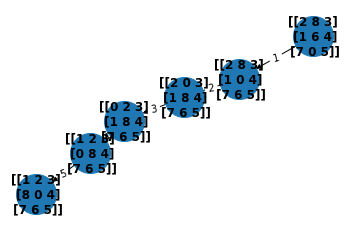

In [128]:
graficar_ruta_nodos(rutaNodos)

In [253]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import pylab
def graficar_ruta_nodos(lista_nodos):
    grap = nx.DiGraph()        
    for i in range(len(lista_nodos)-1):
        j = i+1
        nodoA = lista_nodos[i]           
        nodoB = lista_nodos[j]        
        grap.add_edges_from([(str(nodoA.puzzle), str(nodoB.puzzle))],weight=j)        
        print("Acción: Paso {0} - mover {1} ficha vacia".format(j,nodoB.accion))
    edge_labels=dict([((u,v,),d['weight'])
                     for u,v,d in grap.edges(data=True)])
    pos_labels=nx.circular_layout(grap)
    plt.figure(figsize=(10,8)) 
    grap.size(weight='weight')
    nx.draw_networkx_edge_labels(grap,pos_labels,edge_labels=edge_labels)
    nx.draw(grap,pos_labels, node_size=4000,with_labels=True, font_weight='bold')        
    plt.show()

Acción: Paso 1 - mover Arriba ficha vacia
Acción: Paso 2 - mover Arriba ficha vacia
Acción: Paso 3 - mover Izquierda ficha vacia
Acción: Paso 4 - mover Abajo ficha vacia
Acción: Paso 5 - mover Derecha ficha vacia


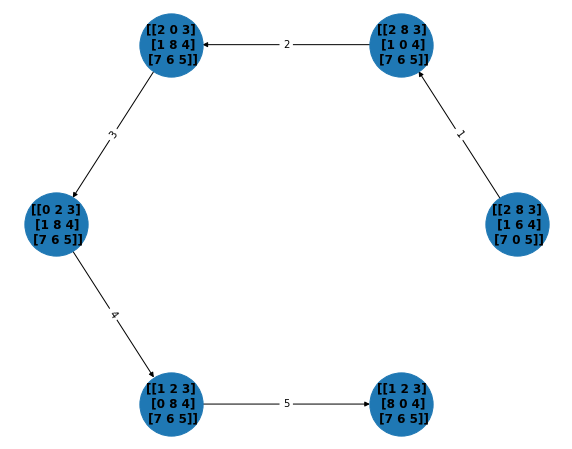

In [254]:
graficar_ruta_nodos(rutaNodos)